## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
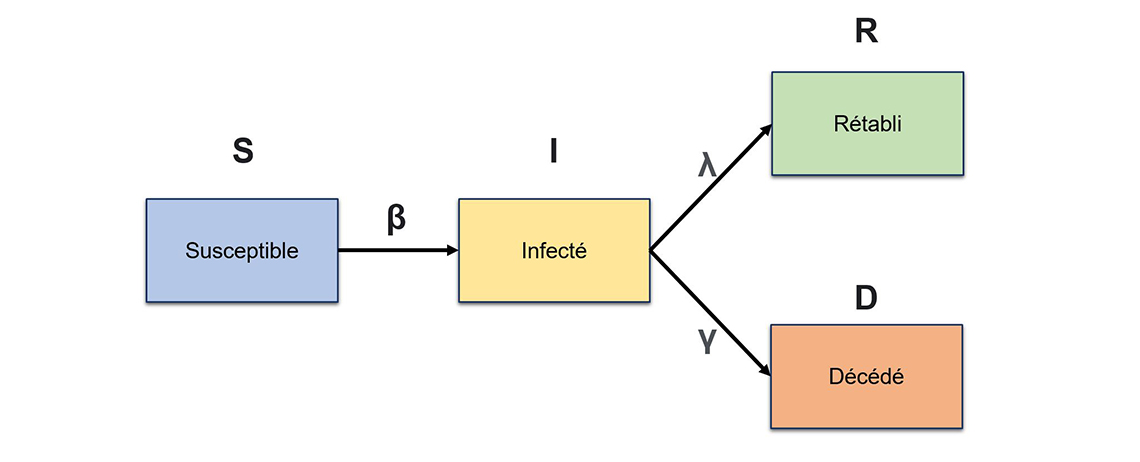


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [ ]:
#0 et 1
import numpy

def sird_forecast(beta, gamma, mu, step, duration):
    time = [0]
    nb_points = int(duration / step)

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        
        new_susceptible_to_be_infected = - beta * susceptible_to_be_infected[-1] * infected[-1] * step + susceptible_to_be_infected[-1]
        new_infected = (beta * susceptible_to_be_infected[-1] * infected[-1] - gamma * infected[-1] - mu * infected[-1]) * step + infected[-1]
        new_recovered = gamma * infected[-1] * step + recovered[-1]
        new_deceased = mu * infected[-1] * step + deceased[-1]

        time.append(new_value_time)
        susceptible_to_be_infected.append(new_susceptible_to_be_infected)
        infected.append(new_infected)
        recovered.append(new_recovered)
        deceased.append(new_deceased)
    
    time = time[::int(1 / step)]
    susceptible_to_be_infected = numpy.array(susceptible_to_be_infected[::int(1 / step)])
    infected = numpy.array(infected[::int(1 / step)])
    recovered = numpy.array(recovered[::int(1 / step)])
    deceased = numpy.array(deceased[::int(1 / step)])
    
    return time, susceptible_to_be_infected, infected, recovered, deceased

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [ ]:
#1 : Simulation SIRD
import numpy

def sird_forecast(beta, gamma, mu, step, duration):
    time = [0]
    susceptible_to_be_infected = [0.99]
    infected = [0.01]
    recovered = [0]
    deceased = [0]

    nb_points = int(duration / step)

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        
        new_susceptible_to_be_infected = - beta * susceptible_to_be_infected[-1] * infected[-1] * step + susceptible_to_be_infected[-1]
        new_infected = (beta * susceptible_to_be_infected[-1] * infected[-1] - gamma * infected[-1] - mu * infected[-1]) * step + infected[-1]
        new_recovered = gamma * infected[-1] * step + recovered[-1]
        new_deceased = mu * infected[-1] * step + deceased[-1]

        time.append(new_value_time)
        susceptible_to_be_infected.append(new_susceptible_to_be_infected)
        infected.append(new_infected)
        recovered.append(new_recovered)
        deceased.append(new_deceased)
    
    time = time[::int(1 / step)]
    susceptible_to_be_infected = numpy.array(susceptible_to_be_infected[::int(1 / step)])
    infected = numpy.array(infected[::int(1 / step)])
    recovered = numpy.array(recovered[::int(1 / step)])
    deceased = numpy.array(deceased[::int(1 / step)])
    
    return time, susceptible_to_be_infected, infected, recovered, deceased

if __name__ == "__main__":
    beta = 0.5
    gamma = 0.15
    mu = 0.015
    step = 0.01
    duration = 90
    time, susceptible_to_be_infected, infected, recovered, deceased = sird_forecast(beta, gamma, mu, step, duration)

In [ ]:
#2 : Code complet étape 1 : Simulation SIRD + traçage courbes
import numpy
import matplotlib.pyplot as plt

def sird_forecast(beta, gamma, mu, step, duration):
    time = [0]
    susceptible_to_be_infected = [0.99]
    infected = [0.01]
    recovered = [0]
    deceased = [0]

    nb_points = int(duration / step)

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        
        new_susceptible_to_be_infected = - beta * susceptible_to_be_infected[-1] * infected[-1] * step + susceptible_to_be_infected[-1]
        new_infected = (beta * susceptible_to_be_infected[-1] * infected[-1] - gamma * infected[-1] - mu * infected[-1]) * step + infected[-1]
        new_recovered = gamma * infected[-1] * step + recovered[-1]
        new_deceased = mu * infected[-1] * step + deceased[-1]

        time.append(new_value_time)
        susceptible_to_be_infected.append(new_susceptible_to_be_infected)
        infected.append(new_infected)
        recovered.append(new_recovered)
        deceased.append(new_deceased)
    
    time = time[::int(1 / step)]
    susceptible_to_be_infected = numpy.array(susceptible_to_be_infected[::int(1 / step)])
    infected = numpy.array(infected[::int(1 / step)])
    recovered = numpy.array(recovered[::int(1 / step)])
    deceased = numpy.array(deceased[::int(1 / step)])
    
    return time, susceptible_to_be_infected, infected, recovered, deceased

def plot_data(time, susceptible_to_be_infected, infected, recovered, deceased):
    plt.figure(figsize=(15, 6))
    plt.plot(time, susceptible_to_be_infected, "--b", label='Prediction : Susceptible to be infected')
    plt.plot(time, infected, "--y", label='Prediction : Infected')
    plt.plot(time, recovered, "--g", label='Prediction : Recovered')
    plt.plot(time, deceased, "--r", label='Prediction : Deceased')
    plt.xlabel('Time (Days)', weight='bold')
    plt.ylabel('Population (%)', weight='bold')
    plt.title('SIRD Model', weight='bold', fontsize=18)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    beta = 0.5
    gamma = 0.15
    mu = 0.015
    step = 0.01
    duration = 90
    time, susceptible_to_be_infected, infected, recovered, deceased = sird_forecast(beta, gamma, mu, step, duration)
    plot_data(time,susceptible_to_be_infected, infected, recovered, deceased)

**Output :**  
![alt text](image-2.png)

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta$, $\gamma$ et $\mu$ qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [ ]:
#1 : Lecture du fichier CSV
import pandas

if __name__ == "__main__":
    ground_truth = pandas.read_csv("sird_dataset.csv")

In [ ]:
#2 : Fonction MSE
def mse(model_prediction, ground_data):
    mse = numpy.square(numpy.subtract(model_prediction, ground_data)).mean()
    return mse

In [ ]:
#3  :Fonction Grid Search
from tqdm.contrib.itertools import product

def grid_search(step, duration, ground_truth):
    betas = numpy.linspace(0.25, 0.5, 8)
    gammas = numpy.linspace(0.08, 0.15, 8)
    mus = numpy.linspace(0.005, 0.015, 8)

    best_beta, best_gamma, best_mu = None, None, None
    best_mse, best_mse_susceptible_to_be_infected, best_mse_infected, best_mse_recovered, best_mse_deceased = float("inf"), float("inf"), float("inf"), float("inf"), float("inf")

    for beta, gamma, mu in product(betas, gammas, mus):
        time, susceptible_to_be_infected, infected, recovered, deceased = sird_forecast(beta, gamma, mu, step, duration)
        mse_susceptible_to_be_infected = mse(susceptible_to_be_infected, ground_truth["Susceptibles"].values)
        mse_infected = mse(infected, ground_truth["Infectés"].values)
        mse_recovered = mse(recovered, ground_truth["Rétablis"].values)
        mse_deceased = mse(deceased, ground_truth["Décès"].values)
        actual_mse = mse_susceptible_to_be_infected + mse_infected + mse_recovered + mse_deceased

        if actual_mse < best_mse:
            best_mse = actual_mse
            best_mse_susceptible_to_be_infected, best_mse_infected, best_mse_recovered, best_mse_deceased = mse_susceptible_to_be_infected, mse_infected, mse_recovered, mse_deceased
            best_beta, best_gamma, best_mu = beta, gamma, mu
    
    print(f"best global MSE = {best_mse:.10f}")
    print(f"best 'Susceptible to be infected' MSE = {best_mse_susceptible_to_be_infected:.10f}")
    print(f"best 'Infected' MSE = {best_mse_infected:.10f}")
    print(f"best 'Recovered' MSE = {best_mse_recovered:.10f}")
    print(f"best 'Deceased' MSE = {best_mse_deceased:.10f}")
    print(f"best beta = {best_beta}, best gamma = {best_gamma}, best_mu = {best_mu}")
    time, susceptible_to_be_infected, infected, recovered, deceased = sird_forecast(best_beta, best_gamma, best_mu, step, duration)
    plot_data(time, susceptible_to_be_infected, infected, recovered, deceased, ground_truth)

In [ ]:
#4 : Code complet étape 3 : 
import numpy
import pandas
import matplotlib.pyplot as plt
from tqdm.contrib.itertools import product

def sird_forecast(beta, gamma, mu, step, duration):
    time = [0]
    susceptible_to_be_infected = [0.99]
    infected = [0.01]
    recovered = [0]
    deceased = [0]

    nb_points = int(duration / step)

    for _ in range(1, nb_points):
        new_value_time = time[-1] + step
        
        new_susceptible_to_be_infected = - beta * susceptible_to_be_infected[-1] * infected[-1] * step + susceptible_to_be_infected[-1]
        new_infected = (beta * susceptible_to_be_infected[-1] * infected[-1] - gamma * infected[-1] - mu * infected[-1]) * step + infected[-1]
        new_recovered = gamma * infected[-1] * step + recovered[-1]
        new_deceased = mu * infected[-1] * step + deceased[-1]

        time.append(new_value_time)
        susceptible_to_be_infected.append(new_susceptible_to_be_infected)
        infected.append(new_infected)
        recovered.append(new_recovered)
        deceased.append(new_deceased)
    
    time = time[::int(1 / step)]
    susceptible_to_be_infected = numpy.array(susceptible_to_be_infected[::int(1 / step)])
    infected = numpy.array(infected[::int(1 / step)])
    recovered = numpy.array(recovered[::int(1 / step)])
    deceased = numpy.array(deceased[::int(1 / step)])
    
    return time, susceptible_to_be_infected, infected, recovered, deceased

def mse(model_prediction, ground_data):
    mse = numpy.square(numpy.subtract(model_prediction, ground_data)).mean()
    return mse

def plot_data(time, susceptible_to_be_infected, infected, recovered, deceased, ground_truth):
    plt.figure(figsize=(15, 6))
    plt.plot(time, susceptible_to_be_infected, "--b", label='Prediction : Susceptible to be infected')
    plt.plot(time, infected, "--y", label='Prediction : Infected')
    plt.plot(time, recovered, "--g", label='Prediction : Recovered')
    plt.plot(time, deceased, "--r", label='Prediction : Deceased')
    plt.plot(time, ground_truth["Susceptibles"], "-b", label='Ground truth : Susceptible to be infected')
    plt.plot(time, ground_truth["Infectés"], "-y", label='Ground truth : Infected')
    plt.plot(time, ground_truth["Rétablis"], "-g", label='Ground truth : Recovered')
    plt.plot(time, ground_truth["Décès"], "-r", label='Ground truth : Deceased')
    plt.xlabel('Time (Days)', weight='bold')
    plt.ylabel('Population (%)', weight='bold')
    plt.title('SIRD Model', weight='bold', fontsize=18)
    plt.legend()
    plt.show()

def grid_search(step, duration, ground_truth):
    betas = numpy.linspace(0.25, 0.5, 8)
    gammas = numpy.linspace(0.08, 0.15, 8)
    mus = numpy.linspace(0.005, 0.015, 8)

    best_beta, best_gamma, best_mu = None, None, None
    best_mse, best_mse_susceptible_to_be_infected, best_mse_infected, best_mse_recovered, best_mse_deceased = float("inf"), float("inf"), float("inf"), float("inf"), float("inf")

    for beta, gamma, mu in product(betas, gammas, mus):
        time, susceptible_to_be_infected, infected, recovered, deceased = sird_forecast(beta, gamma, mu, step, duration)
        mse_susceptible_to_be_infected = mse(susceptible_to_be_infected, ground_truth["Susceptibles"].values)
        mse_infected = mse(infected, ground_truth["Infectés"].values)
        mse_recovered = mse(recovered, ground_truth["Rétablis"].values)
        mse_deceased = mse(deceased, ground_truth["Décès"].values)
        actual_mse = mse_susceptible_to_be_infected + mse_infected + mse_recovered + mse_deceased

        if actual_mse < best_mse:
            best_mse = actual_mse
            best_mse_susceptible_to_be_infected, best_mse_infected, best_mse_recovered, best_mse_deceased = mse_susceptible_to_be_infected, mse_infected, mse_recovered, mse_deceased
            best_beta, best_gamma, best_mu = beta, gamma, mu
    
    print(f"best global MSE = {best_mse:.10f}")
    print(f"best 'Susceptible to be infected' MSE = {best_mse_susceptible_to_be_infected:.10f}")
    print(f"best 'Infected' MSE = {best_mse_infected:.10f}")
    print(f"best 'Recovered' MSE = {best_mse_recovered:.10f}")
    print(f"best 'Deceased' MSE = {best_mse_deceased:.10f}")
    print(f"best beta = {best_beta}, best gamma = {best_gamma}, best_mu = {best_mu}")
    time, susceptible_to_be_infected, infected, recovered, deceased = sird_forecast(best_beta, best_gamma, best_mu, step, duration)
    plot_data(time, susceptible_to_be_infected, infected, recovered, deceased, ground_truth)

if __name__ == "__main__":
    step = 0.01
    duration = 90
    ground_truth = pandas.read_csv("sird_dataset.csv")
    grid_search(step, duration, ground_truth)

**Output :**  
100%|████████████████| 512/512 [00:15<00:00, 32.26it/s]  
best global MSE = 0.0005116089  
best 'Susceptible to be infected' MSE = 0.0001188452      
best 'Infected' MSE = 0.0002014803  
best 'Recovered' MSE = 0.0001438030  
best 'Deceased' MSE = 0.0000474803  
best beta = 0.2857142857142857, best gamma = 0.09, best_mu = 0.009285714285714286  

![alt text](image-1.png)

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0$ = $\frac{\beta}{\gamma + \mu} $

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

In [ ]:
#2

3.